# Credit Card Fraud Detection

the Credit Card Fraud Detection Machine Learning Project stands as a robust solution to combat the rising threat of fraudulent activities. This cutting-edge project leverages advanced machine learning algorithms to analyze and detect potential fraudulent transactions, ensuring the security of financial transactions for both individuals and organizations.

## Importing the Necessary Libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score.

In [2]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
24763,33372.0,1.067469,0.025326,0.298224,0.626073,-0.332730,-0.750055,0.257972,-0.228014,-0.188406,...,0.102951,0.254435,-0.069729,0.494903,0.402907,0.500191,-0.038963,0.023384,79.00,0
205700,135873.0,1.589736,0.043220,-0.992185,3.697473,0.532618,0.326612,0.394753,-0.093730,-1.367194,...,0.437593,0.965696,-0.204439,-0.425262,0.167126,0.209847,-0.065371,-0.035577,173.71,0
169380,119672.0,1.718454,-0.479638,-0.751194,1.287354,0.541989,1.728045,-0.425028,0.468130,1.123719,...,-0.430460,-1.000176,0.452753,-0.636056,-0.478562,-1.034641,0.089145,-0.025603,72.00,0
53614,46073.0,0.563317,-1.024319,0.920991,1.940612,-0.985410,0.692425,-0.190306,0.224721,1.245011,...,-0.255506,-0.874115,-0.148971,0.090743,0.322087,-0.537670,0.039725,0.074938,277.90,0
99698,67242.0,-1.241482,-0.229078,0.673749,-1.323989,-0.437330,-0.652614,-0.360263,0.626707,-1.245871,...,0.299462,0.414136,0.262422,-0.015984,-0.148230,-0.411241,0.164104,-0.054428,99.00,0
90233,62930.0,1.315404,-0.033577,-1.089984,-0.557087,2.029931,3.268130,-0.534994,0.808250,-0.052724,...,-0.313307,-1.068934,0.103797,0.992126,0.369398,0.110374,-0.028302,0.011836,1.98,0
6988,9137.0,0.349277,-2.539493,0.645773,-0.503734,-1.792852,0.986512,-0.927262,0.219743,4.583702,...,0.105308,0.028927,-0.741057,-0.965756,0.491041,0.314925,-0.031749,0.089022,488.99,0
69087,53258.0,0.295316,2.006984,-1.894322,1.596842,0.898471,-1.619762,0.882626,-0.152880,-0.014802,...,-0.155371,-0.024832,0.174195,0.049047,-0.469377,-0.383094,0.484514,0.138261,2.75,0
247871,153720.0,-0.979258,0.493818,1.691756,-0.590750,0.583871,-0.584701,0.682544,0.043847,-0.652809,...,0.064549,0.053333,-0.320060,0.104402,0.586429,0.321841,-0.035427,0.046437,24.95,0
232977,147393.0,2.108108,-0.207740,-3.386067,-0.720760,2.905339,2.932171,0.054796,0.562129,0.017654,...,0.095248,0.367526,0.010535,0.784185,0.412944,0.734475,-0.093999,-0.091945,0.76,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
df.isnull().sum().sum()

0

<AxesSubplot:xlabel='Class', ylabel='count'>

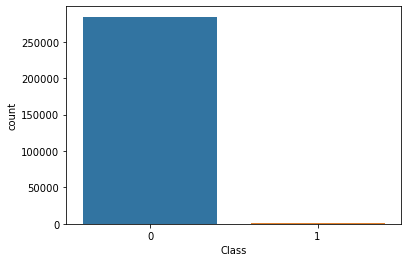

In [22]:
sns.countplot(x = 'Class',data = df)

In [10]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# the dataset is imbalanced

0 --> Normal Transaction

1 --> fraudulent transaction

# separating the column 0 and 1 to balance

In [14]:
legit=df[df.Class==0]
fraud=df[df.Class==1]
print(legit.shape,fraud.shape)

(284315, 31) (492, 31)


In [15]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
#compare the values for both tranctions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [19]:
legit_shape=legit.sample(n=492)
legit_shape

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158878,111905.0,-1.016129,0.421615,1.230946,-0.776548,1.275757,-0.648049,0.721854,0.029504,-0.808553,...,-0.208020,-0.783843,-0.263156,-0.391352,0.510382,0.339266,-0.062624,0.038257,1.98,0
56005,47231.0,1.410461,-0.868409,-1.280988,-1.607718,1.493519,3.377725,-0.996923,0.780993,-0.650136,...,0.014703,-0.057475,-0.162032,1.048337,0.837320,-0.133227,0.003480,0.006151,35.42,0
87231,61592.0,0.820056,-0.390922,0.614128,1.423590,-0.773424,-0.375715,-0.034618,0.008243,0.264006,...,0.310756,0.565251,-0.194431,0.411168,0.414038,-0.227803,0.014652,0.055201,174.15,0
162565,115217.0,-1.886147,1.817174,-1.997046,0.822886,1.325793,-0.677443,1.664101,-1.121922,0.990273,...,-0.164594,0.868647,0.005322,0.519619,-0.670102,0.795633,-1.057308,0.088132,21.23,0
238384,149648.0,1.791031,-0.709074,-0.998452,0.112329,0.522570,1.889692,-0.811487,0.551193,0.788977,...,0.428031,1.391336,0.023820,-0.863099,-0.206288,0.616528,0.014859,-0.061688,59.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211437,138410.0,-2.164030,-0.928464,-1.901757,-0.599173,3.537948,-0.073643,0.533352,0.227321,-0.584752,...,0.441579,1.428242,-1.134524,-0.795729,-0.073551,0.032950,-0.113772,-0.438156,9.52,0
104324,69018.0,-0.908552,0.149729,2.028847,0.142574,-0.265830,-0.723278,0.496400,-0.075668,-0.633310,...,-0.083950,-0.567646,0.222525,0.427701,-0.134316,0.919417,-0.048411,0.088261,110.00,0
96424,65761.0,-3.874800,-0.474915,-0.276192,-2.388118,-2.617120,0.497531,-1.633879,1.984496,-2.311216,...,-0.063329,-0.204991,-0.606955,-0.798475,0.388607,-0.231482,0.277549,-0.188489,152.65,0
107895,70667.0,-0.603848,0.688326,2.095972,0.862908,0.048712,1.176162,-0.070991,0.465062,-0.151176,...,0.326484,1.191614,-0.218243,-0.229819,-0.282896,-0.159720,0.092986,0.136079,5.63,0


# concatenating the two dataframes

In [24]:
new_dataset = pd.concat([legit_shape, fraud], axis=0)

In [25]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158878,111905.0,-1.016129,0.421615,1.230946,-0.776548,1.275757,-0.648049,0.721854,0.029504,-0.808553,...,-0.208020,-0.783843,-0.263156,-0.391352,0.510382,0.339266,-0.062624,0.038257,1.98,0
56005,47231.0,1.410461,-0.868409,-1.280988,-1.607718,1.493519,3.377725,-0.996923,0.780993,-0.650136,...,0.014703,-0.057475,-0.162032,1.048337,0.837320,-0.133227,0.003480,0.006151,35.42,0
87231,61592.0,0.820056,-0.390922,0.614128,1.423590,-0.773424,-0.375715,-0.034618,0.008243,0.264006,...,0.310756,0.565251,-0.194431,0.411168,0.414038,-0.227803,0.014652,0.055201,174.15,0
162565,115217.0,-1.886147,1.817174,-1.997046,0.822886,1.325793,-0.677443,1.664101,-1.121922,0.990273,...,-0.164594,0.868647,0.005322,0.519619,-0.670102,0.795633,-1.057308,0.088132,21.23,0
238384,149648.0,1.791031,-0.709074,-0.998452,0.112329,0.522570,1.889692,-0.811487,0.551193,0.788977,...,0.428031,1.391336,0.023820,-0.863099,-0.206288,0.616528,0.014859,-0.061688,59.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


<AxesSubplot:xlabel='Class', ylabel='count'>

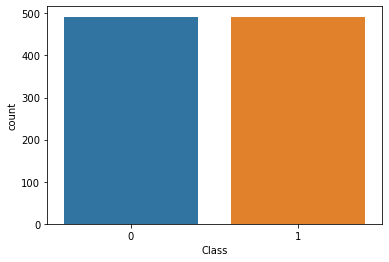

In [27]:
sns.countplot(x = 'Class',data =new_dataset)

Now dataset is balanced 

In [28]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [29]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96981.119919,-0.145189,0.152289,0.074620,-0.070332,0.060180,-0.006463,-0.008842,0.070602,-0.073397,...,-0.025303,-0.001854,0.053698,-0.001093,0.017099,0.027426,-0.041651,-0.013668,-0.002526,67.850752
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


spliting the x and y

In [30]:
x=new_dataset.drop('Class',axis=1)
y=new_dataset['Class']

In [31]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
158878,111905.0,-1.016129,0.421615,1.230946,-0.776548,1.275757,-0.648049,0.721854,0.029504,-0.808553,...,0.089014,-0.208020,-0.783843,-0.263156,-0.391352,0.510382,0.339266,-0.062624,0.038257,1.98
56005,47231.0,1.410461,-0.868409,-1.280988,-1.607718,1.493519,3.377725,-0.996923,0.780993,-0.650136,...,0.218010,0.014703,-0.057475,-0.162032,1.048337,0.837320,-0.133227,0.003480,0.006151,35.42
87231,61592.0,0.820056,-0.390922,0.614128,1.423590,-0.773424,-0.375715,-0.034618,0.008243,0.264006,...,0.117527,0.310756,0.565251,-0.194431,0.411168,0.414038,-0.227803,0.014652,0.055201,174.15
162565,115217.0,-1.886147,1.817174,-1.997046,0.822886,1.325793,-0.677443,1.664101,-1.121922,0.990273,...,0.534107,-0.164594,0.868647,0.005322,0.519619,-0.670102,0.795633,-1.057308,0.088132,21.23
238384,149648.0,1.791031,-0.709074,-0.998452,0.112329,0.522570,1.889692,-0.811487,0.551193,0.788977,...,-0.111157,0.428031,1.391336,0.023820,-0.863099,-0.206288,0.616528,0.014859,-0.061688,59.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [32]:
y

158878    0
56005     0
87231     0
162565    0
238384    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [35]:
print(x.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(984, 30) (787, 30) (197, 30) (787,) (197,)


# Model Training

In [36]:
model=LogisticRegression()

In [37]:
model.fit(X_train,Y_train)

C:\Users\POTHU SREENIVAS\anaconda3\s\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model Evaluation

accuracy score

In [38]:
X_train_pred=model.predict(X_train)
train_acc=accuracy_score(X_train_pred,Y_train)
train_acc

0.9415501905972046

In [39]:
X_test_pred=model.predict(X_test)
test_acc=accuracy_score(X_test_pred,Y_test)
test_acc

0.9187817258883249